# Executive Summary

Name - Mahesh Raut

House Prices - Advanced Regression Techniques

The aim of this project is to predict the sale prices of house based on various features.

Dataset is from the following link:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

Linear Regression was used to estimate the sale prices of house. There are 80 features provided. I chose to ignore feature "Id" as it didn't provide any meaning for prediction of sale price.

Following steps are performed on features to clean:

1. Identify missing values in the dataset and classify them based on numerical and categorical features
2. Replace missing values of numerical data with 0. I have replaced with null values because data might have not be available.
3. Replace missing values of categorical data with appropriate words
4. Converting various attributes of categorical data into features by transforming(encoded as a number either 1, 2, or 3)

The features used for final dataset were selected by performing correlation(checking relation among variables) with threshold greater than 70%. Also, I applied logarithm to saleprices to remove skewness of data.

After looking at the final dataset, I applied linear regression with all the features. I reran the model with those variables on the entire dataset and submitted it to Kaggle. My accuracy was 14.93%.

## My Kaggle Submission

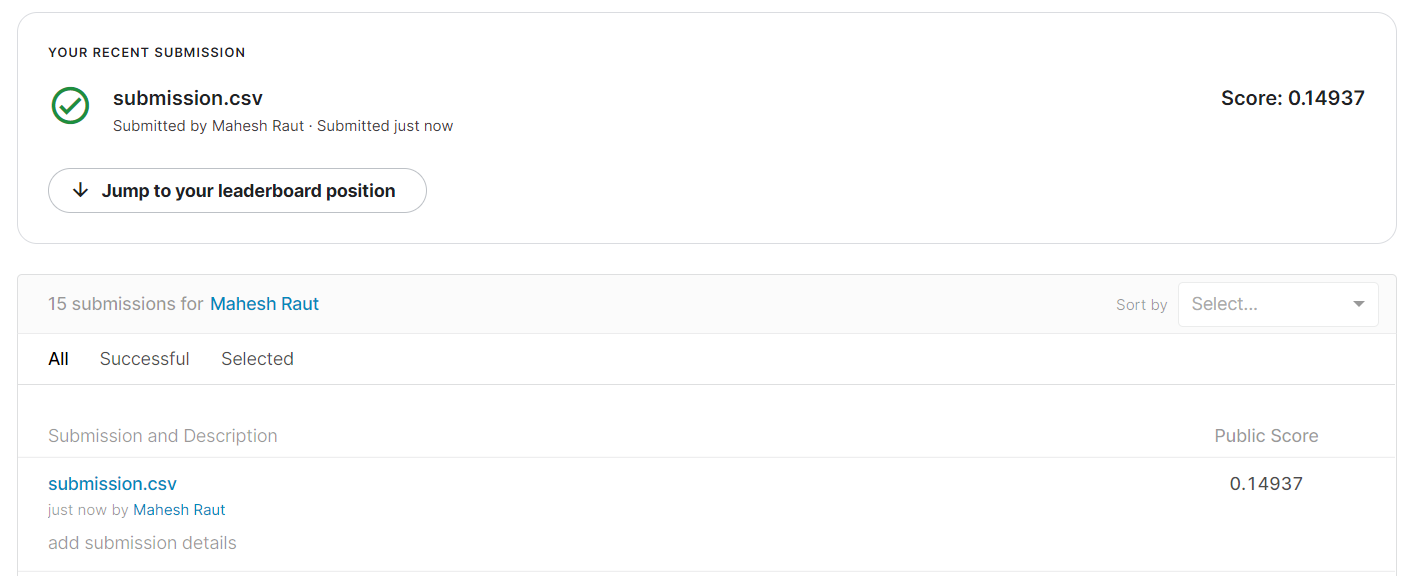

# Ethics Discussion

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, it is not possible to look at all variables while predicting house prices. The data is missing for most of the variables which is not to be desired for prediction.

Considering the house prices, it is important to check the sale prices at a current rate for future prediction of sale prices.


# Detailed Results

## Load data and combine train & test data

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Upload files to notebook

from google.colab import files
uploaded = files.upload()

# Note : Upload train.csv, test.csv and sample_submission.csv from local directory

In [ ]:
# Read .csv files for train and test data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Note: There are 1460 instances of train data and 1459 instances of test data. Total number of features equals 81, of which 36 are numerical, 43 are categorical with Id and SalePrice. There is no SalePrice feature in test set, so remove from train set and save it with another variable and then join train and test set.

In [ ]:
# Dropping saleprice column from train_data

Y_train_data = train_data['SalePrice'].values
train_data.drop('SalePrice', axis=1, inplace=True)

In [ ]:
# Combine train and test data

data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Check for number of missing values

In [ ]:
# Check for missing values in features

dataMissing = data.isnull().sum()
pd.set_option('display.max_rows', dataMissing.shape[0]+1)
dataMissing


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

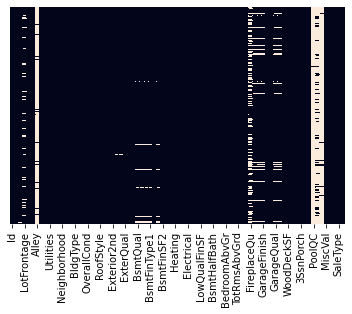

In [ ]:
# Check heatmap for missing data

sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

## Assigning data to missing values

I opted for the replacment with zero strategy for numerical features and the string values on null for categorical features for missing values, as they seemed to be the most sensible ones to use, based on the data provided since we are not sure what the data might be at missing positions.

In [ ]:
# Features with Numerical Data having null values

numerical_data = ["LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
                  "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageYrBlt" , "GarageArea", "GarageCars"]

# Replace zero for numerical data

def assignZero(feature):
  featureValue = data[feature].values
  for value in range(len(featureValue)):
      if np.isnan(featureValue[value]):
        featureValue[value]=float(0)
  featureValueData = pd.DataFrame(featureValue)
  data[feature] = featureValue

for feature in numerical_data:
  assignZero(feature)


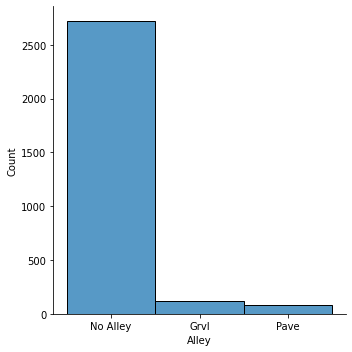

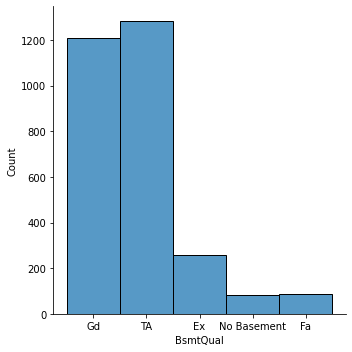

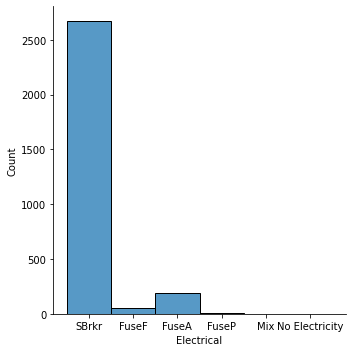

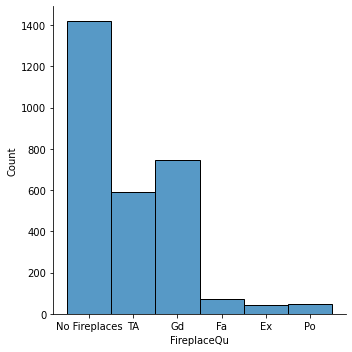

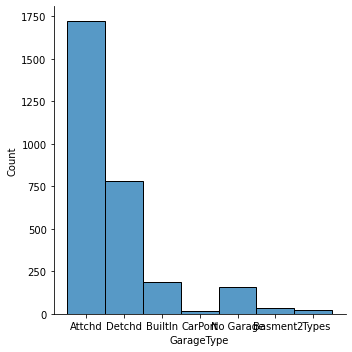

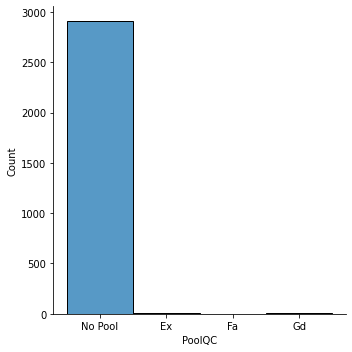

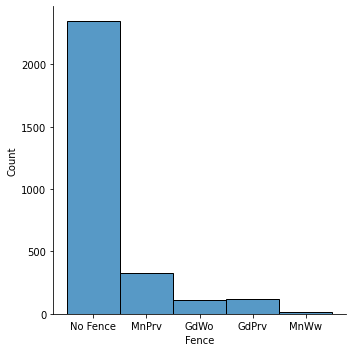

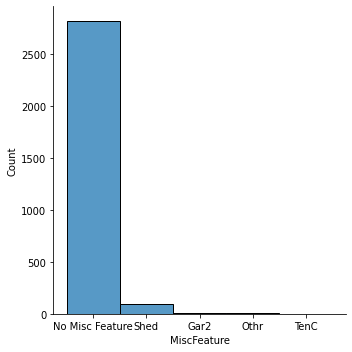

In [ ]:
# Dictionary to replace string in features with categorical data

feature_data = {"Alley" : "No Alley", "BsmtQual": "No Basement", "Electrical" : "No Electricity",
                    "FireplaceQu" : "No Fireplaces", "GarageType" : "No Garage", "PoolQC" : "No Pool",
                    "Fence" : "No Fence", "MiscFeature" : "No Misc Feature"}

def assignString(feature, replaceFeatureValue):
  featureValue = data[feature].values
  featureValueTrue = data[feature].isnull()
  for value in range(len(featureValue)):
      if featureValueTrue[value]:
          featureValue[value] = replaceFeatureValue
  featureValue = pd.DataFrame(featureValue)
  data[feature] = featureValue

for value in feature_data:
  assignString(value, feature_data.get(value))

# Plot to check data is added in feature_data dictionary
for feature in feature_data:
  sns.displot(data[feature])

We have checked the plots for categorical data variables whose null values are replaced with string so that while performing transformation(encoded as a number either 1, 2, or 3), there will be no data with null values.

In [ ]:
# Categorical Data

categorical_data = ["Alley", "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
                    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
                    "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual",
                    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir",
                    "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual",
                    "GarageCond", "PavedDrive", "PoolQC", "Fence", "SaleType", "SaleCondition", "MiscFeature"]

# Applying encoding for Categorical Data

def encodefeatureData(feature, data):
  dummyData = pd.get_dummies(data[feature])
  featureData = pd.concat([data, dummyData], axis=1)
  featureData.drop(feature, axis=1, inplace=True)
  return featureData

for value in categorical_data:
   data = encodefeatureData(value, data)

# Dropping "Id" due to irrelevant feature
data.drop(["Id"], axis=1, inplace=True)

## Logarithmic scale on SalesPrice and Correlated features

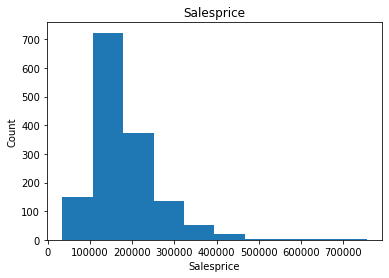

In [ ]:
# Plot to check frequency of Salesprice

plt.hist(Y_train_data)
plt.title('Salesprice')
plt.xlabel('Salesprice')
plt.ylabel('Count')
plt.show()

From the histogram, we can clearly see that the data is skewed right. The highest frequency is around 100k to 250k. The few houses that cost more than 400k seem to be outliers.

In [ ]:
# Perform logarithm on salesprice to remove skewness of data

Y_train = np.log(Y_train_data + 1)


In [ ]:
# Function to perform correleation

def getCorrelatedFeatures(data, threshold):
    corrFeature = set()
    corrMat = data.corr()
    for index in range (len(corrMat.columns)):
        for value in range(index):
            if abs(corrMat.iloc[index, value]) > threshold:
                colName = corrMat.columns[index]
                corrFeature.add(colName)
    return corrFeature

# Perform correlation by setting 70% threshold (threshold is set on considering features to be included in final dataset)
corrFeatures = getCorrelatedFeatures(data, 0.7)

In [ ]:
# Storing into final_data variable

final_data = data.drop(labels = corrFeatures, axis=1)

final_data.shape

(2919, 231)

## Run Model

Linear Regression has been used to model which is a common algorithm used for fitting of data.

In [ ]:
# Reconvert data to train and test
# Separating 1460 instances of train data and 1459 instances of test data

train_set = final_data.iloc[0:1460,:]
print("Train set shape : ", train_set.shape)
test_set = final_data.iloc[1460:2919,:]
print("Test set shape : ", test_set.shape)

Train set shape :  (1460, 231)
Test set shape :  (1459, 231)


In [ ]:
# Predict model using Linear Regression

linear = LinearRegression()
linear.fit(train_set, Y_train)

predictions = linear.predict(test_set)
pred = np.exp(predictions)
print(pred)

[114523.3391873  163268.39073577 179732.70769389 ... 163111.07494382
 112359.22907001 220768.97923186]


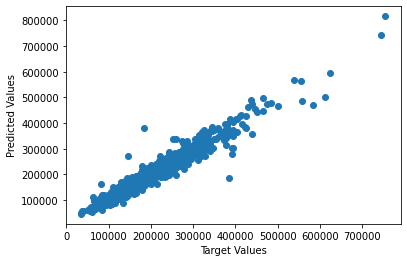

In [ ]:
# Predict data for train_set
predict_train_set = linear.predict(train_set)

# Plot for Predicted training set with given training set
plt.scatter(np.exp(Y_train), np.exp(predict_train_set))
plt.xlabel('Target Values')
plt.ylabel('Predicted Values')
plt.show()

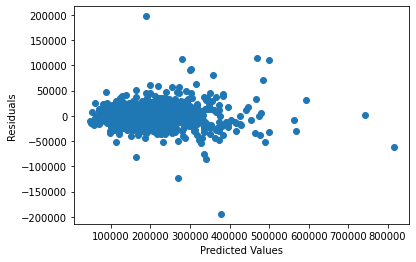

In [ ]:
# Residual Plot

residuals = np.exp(Y_train) - np.exp(predict_train_set)
plt.scatter(y = residuals, x = np.exp(predict_train_set))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:

linear.score(train_set, Y_train)

0.9415823905624212

The R^2 score (i.e accuracy) of prediction is 94.15% shows the variation around the mean which is a good sign.

## Save for Kaggle Submission

In [ ]:
# Read Sample Submission file
predict = pd.DataFrame(pred)
dataFile = pd.read_csv('sample_submission.csv')

# Genarate Sample Submission file
dataset = pd.concat([dataFile['Id'],predict],axis=1)
dataset.columns = ['Id', 'SalePrice']
dataset.to_csv('submission.csv',index=False)


In [ ]:
# Download .csv file to upload on kaggle

from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Interpretations

## Number of Variables
In our final model, we were able to improve accuracy by including only correleated variables and also applying logarithm to sale prices to remove skewness in data. This suggests that the variables which were used seemed to help to increase accuracy.


## Discussion about predicted graphs

The linear graph can be easily drawn from the prediction of training set. Considering the residual plot shows the difference between the observed response and the fitted response values. There are lots of points scattered over null values and there are lots of outliers which is probably not a good fit for regression.

## Discussion about final result

The final results shows that score can be improved according to kaggle. This suggests that something else should be done. In general, I have not used standard scaler to generalize different numerical variables on same scale. There might be another challenges arise from standardizing of data. Also, furthermore stacking regressor can be a good way but needs to be discussed more.